# Warehouse Facility 04 - Warehouse Layout assessment
*This notebook illustrates how to assess the layout and the travelled distances of a storage system.
***
Alessandro Tufano, Ph.D. 2021

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import os

import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe


### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from analogistics.data.data_generator_warehouse import generateWarehouseData
D_locations, D_SKUs, D_movements, D_inventory = generateWarehouseData()


In [4]:
#print locations dataframe
display(HTML(D_locations.head().to_html()))

,NODECODE,IDWH,WHSUBAREA,IDLOCATION,LOCCODEX,LOCCODEY,LOCCODEZ,RACK,BAY,LEVEL
0,1,LOGICAL_WH1,AREA 1,1,0,0,0,0,0,0
0,1,LOGICAL_WH2,AREA 1,2,0,0,1200,0,0,1
0,1,LOGICAL_WH2,AREA 1,3,0,0,2400,0,0,2
0,1,LOGICAL_WH1,AREA 1,4,0,0,3600,0,0,3
0,1,LOGICAL_WH1,AREA 1,5,0,0,4800,0,0,4


In [5]:
#print SKUs master file dataframe
display(HTML(D_SKUs.head().to_html()))

,ITEMCODE,DESCRIPTION,VOLUME,WEIGHT
0,0,PRODOTTO_0,39.511426,1.883621
0,1,PRODOTTO_1,96.708570,7.358464
0,2,PRODOTTO_2,43.870371,7.572892
0,3,PRODOTTO_3,83.147051,8.582423
0,4,PRODOTTO_4,65.096011,7.886607


In [6]:
#print SKUs master file dataframe
display(HTML(D_movements.head().to_html()))

,ITEMCODE,NODECODE,IDWH,WHSUBAREA,IDLOCATION,RACK,BAY,LEVEL,LOCCODEX,LOCCODEY,LOCCODEZ,ORDERCODE,PICKINGLIST,QUANTITY,VOLUME,WEIGHT,TIMESTAMP_IN,INOUT,ORDERTYPE
0,99,1,FAKE,AREA 1,1062,3,14,1,12000,11200,1200,91,91,7.102693,500.797029,21.824987,2020-01-02 02:30:20.369796,-,PICKING
0,78,1,LOGICAL_WH2,AREA 1,506,1,35,0,4000,28000,0,193,193,8.263011,464.930629,27.898999,2020-01-02 04:31:13.141918,+,PUTAWAY
0,35,1,LOGICAL_WH1,AREA 1,275,0,54,4,0,43200,4800,597,597,5.792619,360.323961,34.618508,2020-01-02 06:17:29.401686,+,PICKING
0,41,1,FAKE,AREA 1,298,0,59,2,0,47200,2400,198,198,7.458438,676.266680,18.561232,2020-01-02 07:22:38.639371,-,OTHER
0,37,1,LOGICAL_WH1,AREA 1,502,1,34,1,4000,27200,1200,257,257,1.944748,118.822108,3.799972,2020-01-02 08:41:58.440382,+,OTHER


In [7]:
#print SKUs master file dataframe
display(HTML(D_inventory.head().to_html()))

,NODECODE,IDWH,ITEMCODE,IDLOCATION,QUANTITY,TIMESTAMP
0,1,LOGICAL_WH1,0,869,3.362125,2020-01-02
0,1,LOGICAL_WH2,1,129,114.439582,2020-01-02
0,1,FAKE,2,288,5.337214,2020-01-02
0,1,LOGICAL_WH1,3,432,23.191197,2020-01-02
0,1,FAKE,4,1618,50.624838,2020-01-02


### Create folder hierarchy

In [8]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
root_path = os.path.join(pathResults,f"{string_casestudy}_results")
path_results = os.path.join(root_path,f"P8_warehouseAssessment")

os.makedirs(root_path, exist_ok=True)
os.makedirs(path_results, exist_ok=True)

### Preprocess data to define the warehouse graph

In [9]:
# %% LAYOUT ANALYSIS
from analogistics.supply_chain.P6_placement_problem.warehouse_graph_definition import prepareCoordinates
import numpy as np
path_current = os.path.join(path_results,f"Layout")
os.makedirs(path_current, exist_ok=True)


D_layout, D_IO, D_fake,  allLocs = prepareCoordinates(D_locations)
D_layout['aislecodex'] =np.nan 


# %% PREPARE DATA FOR GRAPH DEFINITION
from analogistics.supply_chain.P6_placement_problem.warehouse_graph_definition import defineWHgraph
G, D_res, D_layout = defineWHgraph(D_layout=D_layout, 
              D_IO=D_IO, 
              D_fake=D_fake,
              allLocs = len(D_locations), 
              draw=False, 
              arcLabel=False, 
              nodeLabel=False, 
              trafficGraph=True)

=======Input point unmapped. I is set to x:8000.0,y:-1
=======Output point unmapped. O is set to x:8000.0,y:-1
=====0 x coordinates have been randomly interpolated


C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\pandas\core\generic.py:7070: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

=====0 y coordinates have been randomly interpolated


### Define tha warehouse graph $G(V,A)$

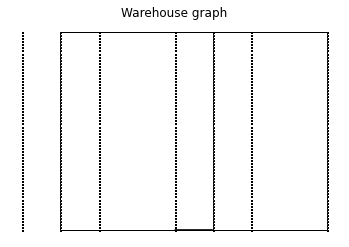

In [10]:
# %% DEFINE THE GRAPH
from  analogistics.graph.graph import printGraph
# print the graph
distance=weight='length'
title='Warehouse graph'
printNodecoords=False

fig1 = printGraph(G, 
           distance, 
           weight, 
           title, 
           arcLabel=False, 
           nodeLabel=False, 
           trafficGraph=False,
           printNodecoords=True,
           D_layout=D_layout)
fig1.savefig(path_current+"//layout_graph.png") 

### Assess the traffic within the warehouse

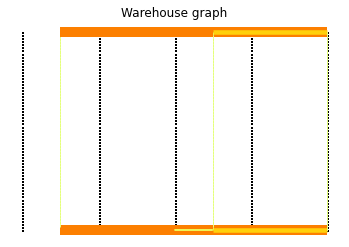

In [11]:
# %% DEFINE TRAFFIC CHART
fig2 = printGraph(G, 
           distance, 
           weight, 
           title, 
           arcLabel=False, 
           nodeLabel=False, 
           trafficGraph=True,
           printNodecoords=False,
           D_layout=D_layout)
fig2.savefig(path_current+"//traffic_graph.png") 

### Exchange storage locations to reduce the travelled distances

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


The expected saving is: 17.299999999999997%


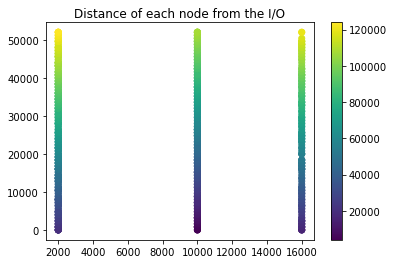

In [12]:
# Exchange te storage locations to place the higher popularities close to the I/O point
from analogistics.supply_chain.P6_placement_problem.warehouse_graph_definition import calculateExchangeSaving
D_results = calculateExchangeSaving(D_movements, D_res, G, useSameLevel=False)


In [13]:
#print and save the locations exchange table
display(HTML(D_results.head().to_html()))
D_results.to_excel(path_current+"\\exchange saving table.xlsx")

,costASIS,costTOBE,distance,idNode,idlocationASIS,idlocationTOBE,loccodex,loccodey,new_distance,new_idNode,popularity,saving_rank,saving_exchange,loccodexTOBE,loccodeyTOBE
0,632814,28014,90402,44,222.0,994.0,2000.0,35200.0,4002,66,7.0,0.955731,-0.000368108,10000.0,0
1,590412,24012,98402,125,956.0,993.0,10000.0,47200.0,4002,66,6.0,0.95933,-0.000369494,10000.0,0
2,297608,16008,74402,110,1212.0,662.0,10000.0,35200.0,4002,66,4.0,0.946211,-0.000364441,10000.0,0
3,124808,22408,31202,83,748.0,996.0,10000.0,13600.0,5602,67,4.0,0.82046,-0.000316007,10000.0,800
4,444808,22408,111202,57,619.0,1000.0,2000.0,45600.0,5602,67,4.0,0.949623,-0.000365756,10000.0,800


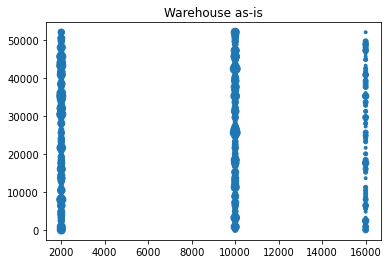

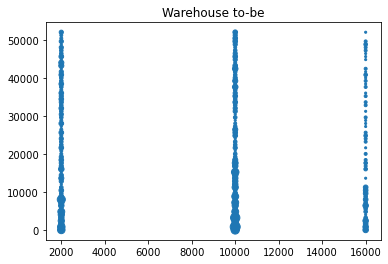

In [14]:
# Compare the as-is scenario, and the exchanged one using a 2-d space productivity plot
from analogistics.supply_chain.P6_placement_problem.warehouse_graph_definition import returnbubbleGraphAsIsToBe
output_figures = returnbubbleGraphAsIsToBe(D_results)
for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 

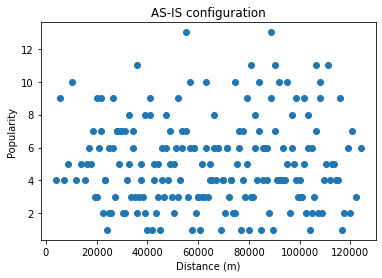

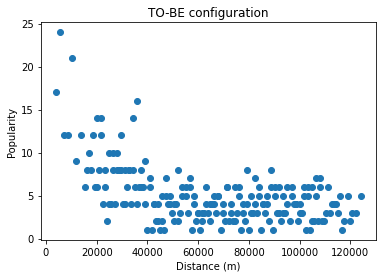

In [15]:
# Compare the as-is scenario, and the exchanged one using a popularity - distance chart
from analogistics.supply_chain.P6_placement_problem.warehouse_graph_definition import asisTobeBubblePopDist
output_figures = asisTobeBubblePopDist(D_results)
for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 